In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.manifold import TSNE

### Carga de dados

In [2]:
# Carregar DataFrame
df_cosmeticos = pd.read_csv('./datasets/cosmeticos.csv')

In [3]:
df_cosmeticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           1472 non-null   object 
 1   Marca          1472 non-null   object 
 2   Nome           1472 non-null   object 
 3   Preco          1472 non-null   int64  
 4   Rating         1472 non-null   float64
 5   Ingredientes   1472 non-null   object 
 6   Pele_Mista     1472 non-null   int64  
 7   Pele_Seca      1472 non-null   int64  
 8   Pele_Normal    1472 non-null   int64  
 9   Pele_Oleosa    1472 non-null   int64  
 10  Pele_Sensivel  1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [4]:
df_cosmeticos.head(10)

,Tipo,Marca,Nome,Preco,Rating,Ingredientes,Pele_Mista,Pele_Seca,Pele_Normal,Pele_Oleosa,Pele_Sensivel
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
5,Moisturizer,TATCHA,The Water Cream,68,4.2,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,0,1,1,1
6,Moisturizer,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,60,4.2,"Water, Glycerin, Caprylic/ Capric Triglyceride...",1,1,1,1,0
7,Moisturizer,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,72,4.4,100% Unrefined Sclerocraya Birrea (Marula) Ker...,1,1,1,1,0
8,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29,4.4,"Water, Glycerin, Cyclohexasiloxane, Squalane, ...",1,1,1,1,1
9,Moisturizer,LA MER,Little Miss Miracle Limited-Edition Crème de l...,325,5.0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0


### EDA


#### Univariada

In [5]:
#transformar os valores da coluna ingredientes em um novo dataframe
df_cosmeticos_eda = df_cosmeticos.copy()

In [6]:
df_cosmeticos_eda = df_cosmeticos_eda['Ingredientes'].str.split(',')

In [7]:
df_cosmeticos_eda

0       [Algae (Seaweed) Extract,  Mineral Oil,  Petro...
1       [Galactomyces Ferment Filtrate (Pitera),  Buty...
2       [Water,  Dicaprylyl Carbonate,  Glycerin,  Cet...
3       [Algae (Seaweed) Extract,  Cyclopentasiloxane,...
4       [Water,  Snail Secretion Filtrate,  Phenyl Tri...
                              ...                        
1467    [Water,  Alcohol Denat.,  Potassium Cetyl Phos...
1468    [Water,  Isododecane,  Dimethicone,  Butylocty...
1469    [Water,  Dihydroxyacetone,  Glycerin,  Scleroc...
1470    [Water,  Dihydroxyacetone,  Propylene Glycol, ...
1471                      [Visit the DERMAFLASH boutique]
Name: Ingredientes, Length: 1472, dtype: object

In [8]:
df_ingredientes = df_cosmeticos_eda.explode('Ingredientes')

In [9]:
df_ingredientes

0              Algae (Seaweed) Extract
1                          Mineral Oil
2                           Petrolatum
3                             Glycerin
4                        Isohexadecane
                     ...              
45811           Alpha-isomethyl Ionone
45812                 CI 14700 (Red 4)
45813              CI 19140 (Yellow 5)
45814               CI 42090 (Blue 1).
45815    Visit the DERMAFLASH boutique
Name: Ingredientes, Length: 45816, dtype: object

In [10]:
#estatisticas das variaveis
df_cosmeticos.describe()

,Preco,Rating,Pele_Mista,Pele_Seca,Pele_Normal,Pele_Oleosa,Pele_Sensivel
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [13]:
#distribuição da variavel tipo
percentual_tipo = df_cosmeticos.value_counts('Tipo') / len(df_cosmeticos) * 100
percentual_tipo = percentual_tipo.reset_index()
percentual_tipo.columns = ['Tipo', 'Percentual']
fig = px.bar(percentual_tipo, x='Tipo', y='Percentual', color='Tipo', text='Percentual' )

#atualizar o plot para melhor visualizar

fig.show()

In [16]:
#distribuição da variavel marca
percentual_Marca = df_cosmeticos.value_counts('Marca') / len(df_cosmeticos) * 100
percentual_Marca = percentual_Marca.reset_index()
percentual_Marca.columns = ['Marca', 'Percentual']
fig = px.bar(percentual_Marca.head(10), y='Marca', x='Percentual', color='Marca', orientation='h', text='Percentual' )

#atualizar o plot para melhor visualizar

fig.show()

In [18]:
#quantidade de marcas
len(df_cosmeticos['Marca'].unique())

116

In [21]:
#distribuição da variavel ingredite
percentual_Ingrediente = df_ingredientes.value_counts('Ingrediente') / len(df_ingredientes) * 100
percentual_Ingrediente = percentual_Ingrediente.reset_index()
percentual_Ingrediente.columns = ['Ingrediente', 'Percentual']
fig = px.bar(percentual_Ingrediente.head(10), y='Ingrediente', x='Percentual', color='Ingrediente', orientation='h', text='Percentual' )

#atualizar o plot para melhor visualizar

fig.show()

In [25]:
#Quantidade igredientes
len(percentual_Ingrediente['Ingrediente'].unique())

7298

In [26]:
# distribuição da variavel preço
px.histogram(df_cosmeticos['Preco'])

In [27]:
# distribuição da variavel rating
px.histogram(df_cosmeticos['Rating'])

### Análise Bivariada

In [29]:
#plot de distribuição por tipo e preço
px.box(df_cosmeticos, x='Preco', y='Tipo', color='Tipo', orientation='h', hover_data=['Marca'] )


In [31]:
#plot de distribuição por tipo e Ratings
px.box(df_cosmeticos, x='Rating', y='Tipo', color='Tipo', orientation='h', hover_data=['Marca'] )


In [33]:
#correlação preço e rating
px.scatter(df_cosmeticos, x='Preco', y='Rating', color='Tipo', hover_data=['Marca'])

In [34]:
#gerar matriz de correlação
matriz_correlacao_cosmeticos = df_cosmeticos.corr(numeric_only=True)


<Axes: >

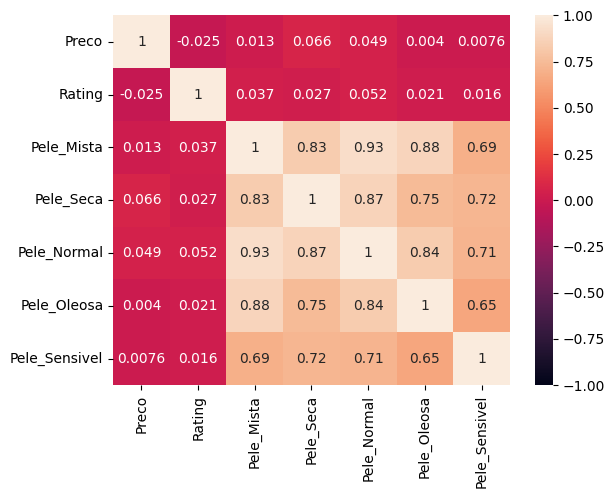

In [35]:
#plotar matriz
sns.heatmap(matriz_correlacao_cosmeticos, vmin=-1, vmax=1, annot=True)

### Treinar o algoritmo t-SNE

In [42]:
#Copiar Dataframe original
X = df_cosmeticos.copy()
X.drop(columns=['Nome', 'Ingredientes'], axis=1, inplace=True)

In [47]:
#separando variaveis numericas e categoricas
numeric_features = ['Rating', 'Preco']
categorical_features = ['Marca', 'Tipo']

In [48]:
numeric_trans = StandardScaler()
categorical_trans = OneHotEncoder()

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_trans, numeric_features),
        ('cat', categorical_trans, categorical_features)
    ],
    remainder='passthrough'
)

In [50]:
#transformar dados
X_transformed = preprocessor.fit_transform(X)

In [51]:
# Armazenar resultados do t-sne em um dataframe
results_df = pd.DataFrame()



In [54]:
#loop de treinamento do algoritmo mudando o parametro perplexity
for perplexity in range(5,51,1):
    tsne = TSNE(n_components=2, perplexity=perplexity, init='random', n_iter=250, random_state=51)
    tsne_results = tsne.fit_transform(X_transformed)

    #armazenar resultados
    temp_df = pd.DataFrame(tsne_results, columns=['Componente 1', 'Componente 2'])
    temp_df['Perplexity'] = perplexity
    results_df = pd.concat([results_df, temp_df], axis=0)


c:\Users\ThayanneCristinedaSi\.virtualenvs\Geral-iNcLO_qr\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

c:\Users\ThayanneCristinedaSi\.virtualenvs\Geral-iNcLO_qr\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

c:\Users\ThayanneCristinedaSi\.virtualenvs\Geral-iNcLO_qr\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

c:\Users\ThayanneCristinedaSi\.virtualenvs\Geral-iNcLO_qr\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

c:\Users\ThayanneCristinedaSi\.virtualenvs\Geral-iNcLO_qr\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will 

In [58]:
#reset no indice para realizar o plot
results_df.head(10)

,Componente 1,Componente 2,Perplexity
0,-0.683115,-0.433704,5
1,-0.782577,-0.418713,5
2,0.879272,0.047187,5
3,-0.696451,-0.425203,5
4,1.176079,-0.333812,5
5,0.268875,-0.344152,5
6,0.874186,0.033547,5
7,0.875882,0.045939,5
8,1.225970,-0.179582,5
9,-1.316084,0.338333,5


In [56]:
results_df.reset_index(drop=True, inplace=True)

### Visualizar resultados

In [59]:
#criar scater plot animado com variação no perplexity
fig = px.scatter(results_df, x='Componente 1', y='Componente 2', animation_frame='Perplexity')
fig.show()

#### Mostrar em 3d

In [60]:
# Armazenar resultados do t-sne em um dataframe
results_df = pd.DataFrame()

In [61]:
#loop de treinamento do algoritmo mudando o parametro perplexity
for perplexity in range(5,51,1):
    tsne = TSNE(n_components=3, perplexity=perplexity, init='random', n_iter=250, random_state=51)
    tsne_results = tsne.fit_transform(X_transformed)

    #armazenar resultados
    temp_df = pd.DataFrame(tsne_results, columns=['Componente 1', 'Componente 2', 'Componente 3'])
    temp_df['Perplexity'] = perplexity
    results_df = pd.concat([results_df, temp_df], axis=0)


c:\Users\ThayanneCristinedaSi\.virtualenvs\Geral-iNcLO_qr\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

c:\Users\ThayanneCristinedaSi\.virtualenvs\Geral-iNcLO_qr\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

c:\Users\ThayanneCristinedaSi\.virtualenvs\Geral-iNcLO_qr\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

c:\Users\ThayanneCristinedaSi\.virtualenvs\Geral-iNcLO_qr\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

c:\Users\ThayanneCristinedaSi\.virtualenvs\Geral-iNcLO_qr\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will 

In [62]:
#criar scater plot animado com variação no perplexity
fig = px.scatter_3d(results_df, x='Componente 1',z='Componente 3', y='Componente 2', animation_frame='Perplexity')
fig.show()